In [11]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

import seaborn as sns
import os
import sys
import logging

In [2]:
perturb_seq_file = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/perturb_seq_male/240401_merged.h5ad'
output_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/other_files/objects'

In [3]:
# read h5ad using scanpy
adata_perturb_seq = sc.read_h5ad(perturb_seq_file)

In [4]:
adata_perturb_seq

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'pattern', 'read', 'sequence', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'tota

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'group'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

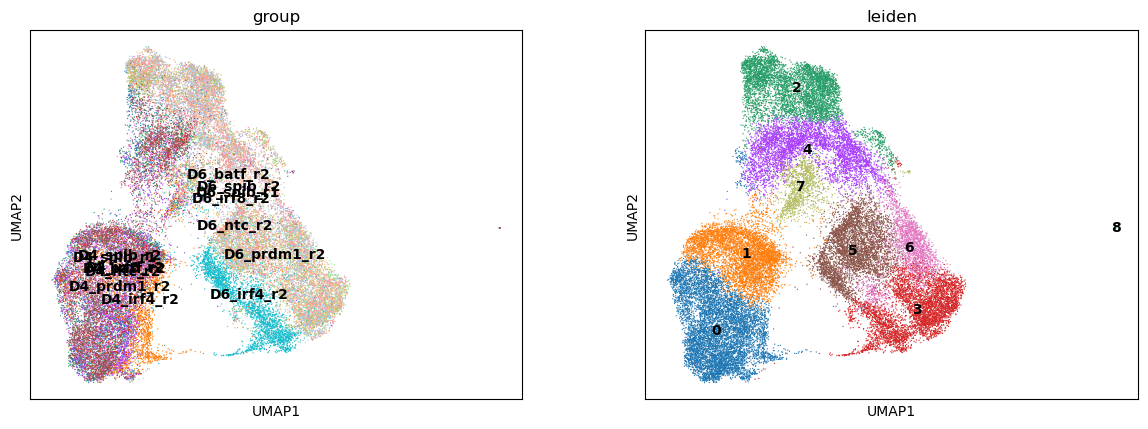

In [5]:
sc.pl.umap(adata_perturb_seq, color=['group', 'leiden'], legend_loc='on data', show=False)

### Feature selection

In [17]:
# mitochondrial genes
adata_perturb_seq.var["mt"] = adata_perturb_seq.var_names.str.startswith("MT-")
# ribosomal genes
adata_perturb_seq.var["ribo"] = adata_perturb_seq.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata_perturb_seq.var["hb"] = adata_perturb_seq.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata_perturb_seq, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata_perturb_seq

AnnData object with n_obs × n_vars = 35822 × 22950
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_coun

In [18]:
# get the normalized range of gene expression
print(adata_perturb_seq.X.min())
print(adata_perturb_seq.X.max())
print(adata_perturb_seq.X.mean())


0.0
8.397678
0.15175162


/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:839: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


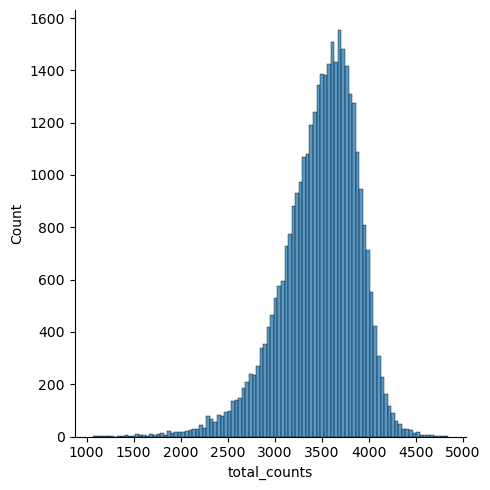

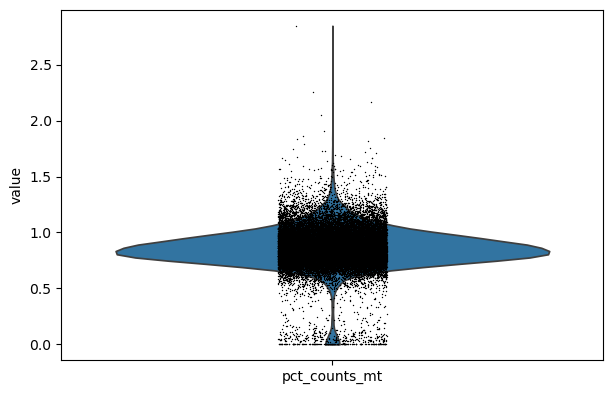

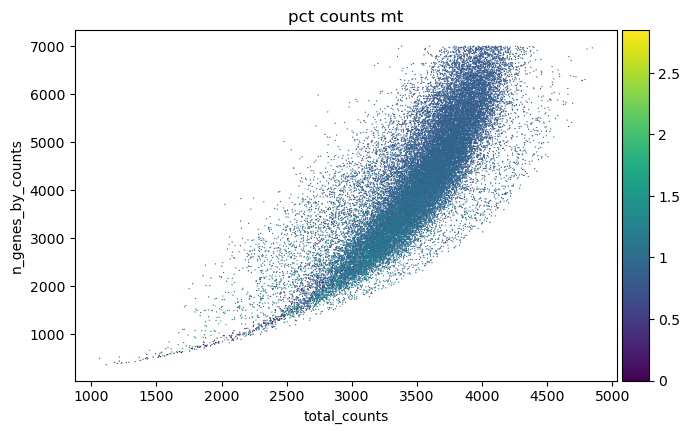

In [19]:
p1 = sns.displot(adata_perturb_seq.obs["total_counts"], bins=100, kde=False) # the distribution tells us that the expression is normalized by log1p
# sc.pl.violin(adata_subset, 'total_counts')
p2 = sc.pl.violin(adata_perturb_seq, "pct_counts_mt")
p3 = sc.pl.scatter(adata_perturb_seq, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [20]:
def feature_selection(adata, gene_list = None):
    sc.pp.highly_variable_genes(adata, flavor='cell_ranger',n_top_genes=3000) 
    # MODIFY FILTERED_GENES TO ADD GENES OF INTEREST
    # Overriding the bool_list to include TF of interest
    if gene_list is not None:
        for gene in gene_list:
            if adata.var['highly_variable'][gene] == False:
                adata.var['highly_variable'][gene] = True
    #subset the anndata for trajectory dimensionality reduction
    adata = adata[:, adata.var.highly_variable]
    return adata

In [21]:
def dim_reduction(adata):
    #Scale before running PCA
    sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
    sc.pp.scale(adata, max_value=10)
    sc.pp.pca(adata)
    sc.pl.pca_variance_ratio(adata, n_pcs=20, log=True)
    return adata

In [22]:
TFs_of_importance = ["BATF","IRF8","SPIB","IRF4","PRDM1","BCL6"]
marker_list = ["IL10", "AICDA", "IL4R", "FCER2", "BCL6", "JUN", "CD69", "JCHAIN", "CD27", "CD38", "XBP1", "MZB1", "MKI67"]
TF_perturb_list = ["BATF3","EGR1","FOS","IKZF1","IRF1","JUNB","JUND","MEF2A","MEF2C","MYB","NFATC1","NFATC2","NFIL3","NFKB1","NFKB2","PAX5","RUNX1","SP3","SPI1","STAT1","STAT5A","TCF12","VDR","XBP1","ZBTB7A"]
gene_list = list(set(TFs_of_importance + TF_perturb_list + marker_list))
# get the highly variable genes
adata = feature_selection(adata_perturb_seq, gene_list)
adata


/tmp/ipykernel_66631/2021952767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.var['highly_variable'][gene] = True


View of AnnData object with n_obs × n_vars = 35822 × 3012
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'p

In [24]:
print(adata.X.shape)
print(adata.layers['counts'].shape)
print(adata.X.max())
print(adata.X.min())
print(adata.X.mean())

(35822, 3012)
(35822, 3012)
8.397678
0.0
0.14337854


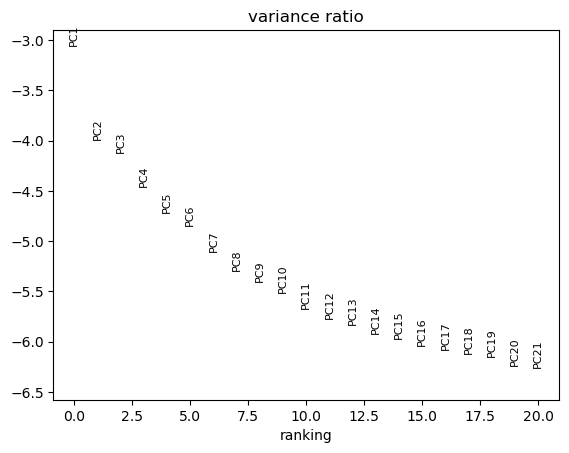

In [25]:
adata = dim_reduction(adata)

/ocean/projects/cis240075p/asachan/.conda/envs/scvelo/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


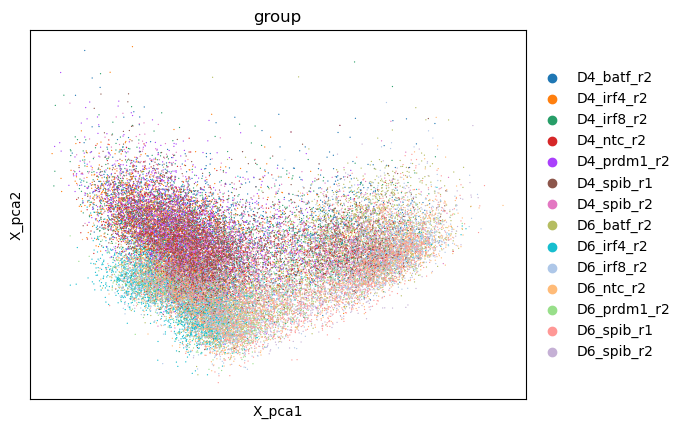

In [27]:
# plot using X_pca
sc.pl.embedding(adata, basis='X_pca', color=['group'])

### Subset the irf4-- and prdm1-- cells

In [28]:
adata_subset = adata[adata.obs['group'].isin(['D4_prdm1_r2', 'D4_irf4_r2'])]

In [29]:
adata_subset

View of AnnData object with n_obs × n_vars = 4689 × 3012
    obs: 'group', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'topic_32', 'topic_33', 'topic_34', 'topic_35', 'topic_36', 'day', 'knockout', 'replicate', 'D6_spib_r2', 'x', 'D6_prdm1_r2', 'D4_irf8_r2', 'D6_irf4_r2', 'D4_batf_r2', 'D4_irf4_r2', 'D4_prdm1_r2', 'D6_batf_r2', 'D6_ntc_r2', 'D4_spib_r2', 'D4_ntc_r2', 'D6_irf8_r2', 'D4_spib_r1', 'D6_spib_r1', 'leiden', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'log1p_total_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pc

In [30]:
# save the adata in objects 
adata_subset.write(os.path.join(output_folder , "stream_input_perturb_seq.h5ad"))